In [1]:
from functions.sky_functions import *
from functions.alignment_functions import *
from functions.visualization_functions import *

from astropy.table import Table

## Load in data
Must be a catalog of 2d shapes with compex ellipticities [E1, E2] and positions [RA, DEC]
If using weights, r-w1 color also necessary

In [2]:
LRGs = Table.read('sample_data/sample_LRGs.fits')

In [3]:
LRGs[:4]

RA,DEC,FLUX_R,FLUX_Z,FLUX_W1,E1,E2,zmag,rz,rw1
float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
200.01126510964488,1.184772721711952,6.751958,21.43266,55.805935,-0.06397945,0.009995843,19.17231,1.2541158,2.2931266
200.0145060556931,1.178786174342609,8.18776,25.940357,59.05693,-0.12400029,0.022351222,18.965061,1.2520272,2.1452644
200.0170503174841,1.2067389904454537,8.926818,26.637094,60.219337,-0.10410782,-0.020560648,18.936283,1.1869754,2.0725982
200.01745600192672,1.1619329580951878,3.6599488,14.317721,43.038696,0.20927882,-0.18908519,19.610315,1.4809972,2.67596


## Measure alignment

In [4]:
measure_alignment(LRGs, weights='sample_data/rw1_weights.npy', save_path='sample_results/alignment0_', delta_rw1_max=5)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/astropy/table/table.py:3075: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Working on 1/100
So far it's been 0.006  minutes

Working on 11/100
So far it's been 0.039  minutes

Working on 21/100
So far it's been 0.073  minutes

Working on 31/100
So far it's been 0.102  minutes

Working on 41/100
So far it's been 0.139  minutes

Working on 51/100
So far it's been 0.17  minutes

Working on 61/100
So far it's been 0.205  minutes

Working on 71/100
So far it's been 0.235  minutes

Working on 81/100
So far it's been 0.265  minutes

Working on 91/100
So far it's been 0.301  minutes

Finished! Total time:  0.3312994361  minutes



#### Measuring alignment again, but without a stricter limit on delta_rw1_max
This is the maximum ammount of r-w1 color difference that two galaxies can have to be counted as a pair. Generally, the closer two galaxies are in color space, the more likely they are to be physically associated.

In [5]:
measure_alignment(LRGs, weights='sample_data/rw1_weights.npy', save_path='sample_results/alignment1_', delta_rw1_max=.1)

Working on 1/100
So far it's been 0.001  minutes

Working on 11/100
So far it's been 0.013  minutes

Working on 21/100
So far it's been 0.023  minutes

Working on 31/100
So far it's been 0.033  minutes

Working on 41/100
So far it's been 0.043  minutes

Working on 51/100
So far it's been 0.057  minutes

Working on 61/100
So far it's been 0.068  minutes

Working on 71/100
So far it's been 0.078  minutes

Working on 81/100
So far it's been 0.09  minutes

Working on 91/100
So far it's been 0.102  minutes

Finished! Total time:  0.1125851631  minutes



## Plotting Results

/global/u1/c/clamman/IA/ellipse-alignment/functions/visualization_functions.py:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


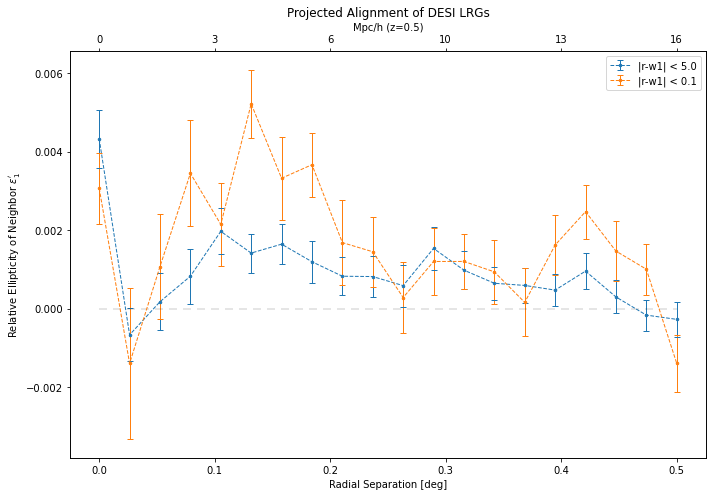

In [6]:
plot_rel_e(results_paths=['sample_results/alignment0_', 'sample_results/alignment1_'], 
           labels=['|r-w1| < 5.0', '|r-w1| < 0.1'])

As you can see, galaxies which are more likely to be physically near each other are are more aligned.